In [49]:
# Import for OpenCV
import cv2

import numpy as np
import matplotlib.pyplot as plt 

### For more info about histogram :

- Color Picker tool:
https://colorpicker.dev/#b36151

- To visualize the shape of the distrbusion.
https://www.youtube.com/watch?v=BwpkZQZ3ttw&ab_channel=MathandScience 
https://youtube.com/shorts/Cj02kEJOjCY?si=NQHQpec5XKYqrtEP

- In image processing, a histogram represents the distribution of pixel intensities (or colors) in an image. It provides a graphical representation of the tonal distribution, showing the number of pixels for each intensity value.

### Key Aspects of Histograms:
- For grayscale images, the histogram plots the number of pixels for each intensity level (0 to 255 for 8-bit images).
    The x-axis represents intensity values, while the y-axis shows the number of pixels at each intensity.
    Color Images:

- For color images, separate histograms can be plotted for each channel (Red, Green, Blue).
    Each channel's histogram shows the distribution of its respective color intensities.
    Uses of Histograms:

    Contrast Adjustment: Analyze and adjust the contrast to enhance image details.
    Image Segmentation: Separate regions based on intensity levels.

- Thresholding: Determine appropriate threshold values for binarization.
- Exposure Analysis: Assess whether an image is overexposed or underexposed.
- Feature Extraction: Aid in extracting image features for computer vision tasks.

Visualization:

    Peaks in the histogram indicate many pixels at specific intensity levels.
    A spread-out histogram suggests a high contrast image, while a narrow histogram indicates low contrast.

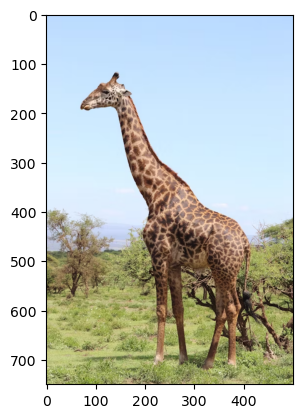

In [50]:

# Load the image and get it as greyscale
image = cv2.imread("./images/giraf.jpg")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

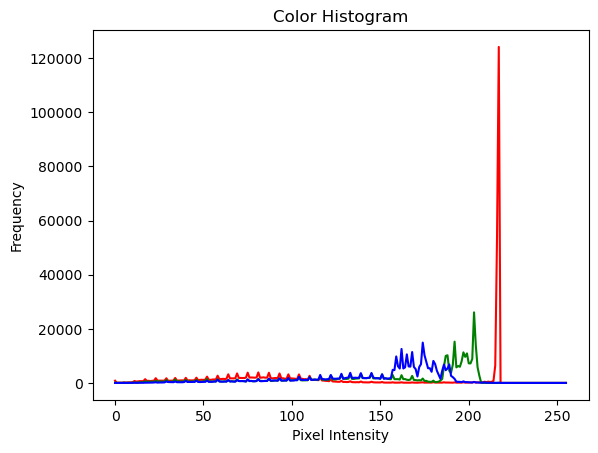

In [51]:
# split the image into it's basic Channels (Colors)
channels = cv2.split(image)
colors = ['red', 'green', 'blue']

# get the histogram
for channel, color in zip(channels,colors):
    # Channel, channel_0(one Channel), None Mask, histogram size, intensity values range
    histogram = cv2.calcHist([channel],[0], None, [256],[0,300])
    plt.plot(histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

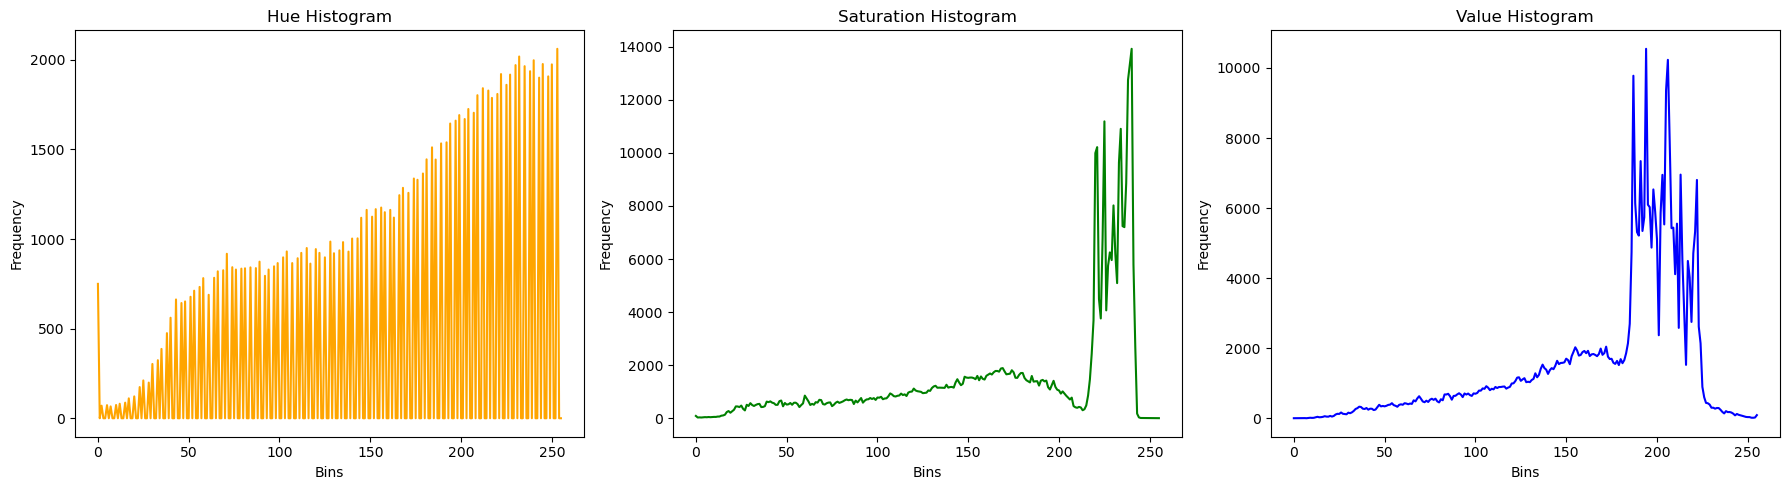

In [54]:
# To ge the image pixels intensity 
# get the hsv image 
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# split the HSV image to it's basic values of HSV, to get the H,S,V values for every pixel in the image.
hue, sat, val = cv2.split(image)

# For Hue array, it carries the colors in the image, so calculate the frequency ( how many times) every hue value is repeated in the image 
 # Since the image most colors are between red,orange , brown and green, 
 # So, we Calculate the frequency for how many times the same color is repeat in the image till color with value 100 -> which are the frequency that every color from red,brown,orange and green is repeated in the image.
hist_h = cv2.calcHist([hue],[0], None, [256],[0,100])
# For Saturation array, it carries the intensity values in the image, so calculate the frequency ( how many times) every intensity value is repeated in the image, for higher pins , if the frequency is high, means the image was more bright than more dark
hist_s = cv2.calcHist([sat],[0], None, [256],[0,256])
# For Value array, it carries the brightness values in the image, so calculate the frequency ( how many times) every brightness value is repeated in the image , for higher pins , if the frequency is high, means the image was more bright than more dark
hist_v = cv2.calcHist([val],[0], None, [256],[0,256])

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Show the Hue
axes[0].plot(hist_h, color='Orange')
axes[0].set_title("Hue Histogram")
axes[0].set_xlabel("Bins")
axes[0].set_ylabel("Frequency")

# Show the Saturation
axes[1].plot(hist_s, color='green')
axes[1].set_title("Saturation Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Frequency")


# Show the Value
axes[2].plot(hist_v, color='Blue')
axes[2].set_title("Value Histogram")
axes[2].set_xlabel("Bins")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Peaks show more toward the brightcolors and the intensities show a good dynamic range.

## Further explanations:

1- In Hue Histogram: 
- at bin = 100, we have high frequency at around 2000, this means the green color with hue = 100 is used more times through the image. If looked to the image yes, you can find the green in the image is more 
<img src="images/hsv_green.jpg" style="width:800px; height:500px;" />

- at bin = 10, we have low frequency at around 200, this means the red color with hue = 10 is used less number of times in the image. you bearly can see any red colors,  which makes sense.
<img src="images/hsv_red.jpg" style="width:800px; height:500px;" />

2- In the Saturation Histogram 

<img src="images/hsv_cone.jpg" style="width:300px; height:200px;" />
If you remember the HSV_Cone, you can find that the number of pixels with saturation values less than 210 is low in comparison to number of pixels with saturation values greater than 210, this means the majjority of pixel colors shirft toward the color it self, means the image is not much brighter